<a href="https://colab.research.google.com/github/danendradgp/Tugas-10/blob/main/Tugas%2010%20Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/Dataset

/content/drive/MyDrive/Dataset


In [3]:
ls

Transportation/


In [5]:
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import os

In [7]:
print("[INFO] loading images...")
imagePaths = paths.list_images("Transportation")
data = []
labels = []

[INFO] loading images...


In [8]:
for imagePath in imagePaths:
	# load the input image from disk, resize it to 64x64 pixels, scale
	# the pixel intensities to the range [0, 1], and then update our
	# images list
	image = Image.open(imagePath)
	image = np.array(image.resize((120, 120))) / 255.0
	data.append(image)

	# extract the class label from the file path and update the
	# labels list
	label = imagePath.split(os.path.sep)[-2]
	labels.append(label)

In [9]:
print(labels)

['motorcycle', 'motorcycle', 'motorcycle', 'motorcycle', 'motorcycle', 'motorcycle', 'motorcycle', 'motorcycle', 'motorcycle', 'motorcycle', 'boat', 'boat', 'boat', 'boat', 'boat', 'boat', 'boat', 'boat', 'boat', 'boat', 'cars', 'cars', 'cars', 'cars', 'cars', 'cars', 'cars', 'cars', 'cars', 'cars']


In [10]:
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [ ]:
print(labels)

In [12]:
(trainX, testX, trainY, testY) = train_test_split(np.array(data),	np.array(labels), test_size=0.25)
print(trainX.shape)
print(testX.shape)

(22, 120, 120, 3)
(8, 120, 120, 3)


In [16]:
from keras.models import Sequential
from keras.layers.core import Flatten
from keras.layers.core import Dense

model = Sequential(
	[
		Flatten(input_shape=(120*120*3,)),
		Dense(100, activation="relu", name="layer1"),
		Dense(16, activation="relu", name="layer2"),
		Dense(16, activation="relu", name="layer3"),
		Dense(3, activation = "softmax", name="layer4"),
	]
)

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 43200)             0         
_________________________________________________________________
layer1 (Dense)               (None, 100)               4320100   
_________________________________________________________________
layer2 (Dense)               (None, 16)                1616      
_________________________________________________________________
layer3 (Dense)               (None, 16)                272       
_________________________________________________________________
layer4 (Dense)               (None, 3)                 51        
Total params: 4,322,039
Trainable params: 4,322,039
Non-trainable params: 0
_________________________________________________________________


In [18]:
print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-3 / 50)
model.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=30, batch_size=10)

[INFO] training network...
Epoch 1/30
3/3 [==============================] - 0s 75ms/step - loss: 3.8431 - accuracy: 0.2727 - val_loss: 5.3214 - val_accuracy: 0.2500
Epoch 2/30
3/3 [==============================] - 0s 22ms/step - loss: 3.1282 - accuracy: 0.3636 - val_loss: 1.3710 - val_accuracy: 0.5000
Epoch 3/30
3/3 [==============================] - 0s 19ms/step - loss: 0.9943 - accuracy: 0.6818 - val_loss: 2.2050 - val_accuracy: 0.3750
Epoch 4/30
3/3 [==============================] - 0s 19ms/step - loss: 1.6263 - accuracy: 0.5455 - val_loss: 5.6081 - val_accuracy: 0.3750
Epoch 5/30
3/3 [==============================] - 0s 19ms/step - loss: 1.8408 - accuracy: 0.6818 - val_loss: 5.6992 - val_accuracy: 0.5000
Epoch 6/30
3/3 [==============================] - 0s 20ms/step - loss: 0.5724 - accuracy: 0.8636 - val_loss: 1.8105 - val_accuracy: 0.8750
Epoch 7/30
3/3 [==============================] - 0s 20ms/step - loss: 0.3753 - accuracy: 0.9545 - val_loss: 2.1833 - val_accuracy: 0.6250


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


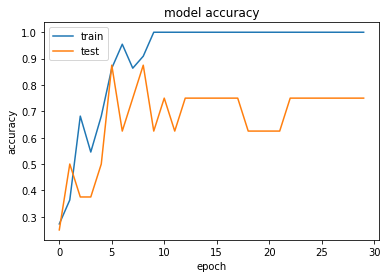

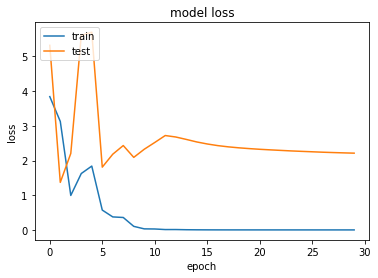

In [19]:
import matplotlib.pyplot as plt
print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [20]:
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=5)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

        boat       0.67      1.00      0.80         2
        cars       0.67      1.00      0.80         2
  motorcycle       1.00      0.50      0.67         4

    accuracy                           0.75         8
   macro avg       0.78      0.83      0.76         8
weighted avg       0.83      0.75      0.73         8

